In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import io
dataset = pd.read_csv('CarPrice_Assignment.csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
dataset = dataset.sample(frac=1)

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 74 to 21
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Drop car_ID and CarName

In [9]:
dataset.drop(columns='car_ID', inplace=True)
dataset.drop(columns='CarName', inplace=True)
dataset.head(10)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
28,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
82,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
158,0,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
66,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
64,0,gas,std,four,hatchback,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245.0
159,0,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0
68,-1,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
84,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0
92,1,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849.0


One hot encoding

In [10]:
dataset = pd.get_dummies(dataset, prefix=['fueltype','aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 
                                          'fuelsystem'])

In [11]:
dataset.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
74,1,112.0,199.2,72.0,55.4,3715,304,3.80,3.35,8.0,...,0,0,0,0,0,0,0,1,0,0
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
82,3,95.9,173.2,66.3,50.2,2833,156,3.58,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
158,0,95.7,166.3,64.4,53.0,2275,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
66,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
dataset.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

Split train and test set

In [13]:
y = dataset['price']

In [14]:
y

74     45400.0
28      8921.0
82     12629.0
158     7898.0
66     18344.0
        ...   
175     9988.0
46     11048.0
120     6229.0
91      6649.0
21      5572.0
Name: price, Length: 205, dtype: float64

In [15]:
dataset.drop(columns='price', inplace=True)

In [16]:
dataset.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
74,1,112.0,199.2,72.0,55.4,3715,304,3.80,3.35,8.0,...,0,0,0,0,0,0,0,1,0,0
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
82,3,95.9,173.2,66.3,50.2,2833,156,3.58,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
158,0,95.7,166.3,64.4,53.0,2275,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
66,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
dataset.shape

(205, 52)

In [18]:
X_train = dataset[:104]

In [19]:
Y_train = y[:104]

In [20]:
X_test = dataset[104:165]

In [21]:
Y_test = y[104:165]

In [22]:
X_val = dataset[165:]

In [23]:
Y_val = y[165:]

Normalization of data

In [24]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
74,1,112.0,199.2,72.0,55.4,3715,304,3.80,3.35,8.0,...,0,0,0,0,0,0,0,1,0,0
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
82,3,95.9,173.2,66.3,50.2,2833,156,3.58,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
158,0,95.7,166.3,64.4,53.0,2275,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
66,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,114.2,198.9,68.4,58.7,3430,152,3.70,3.52,21.0,...,0,0,0,0,0,1,0,0,0,0
81,3,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
115,0,107.9,186.7,68.4,56.7,3075,120,3.46,3.19,8.4,...,0,0,0,0,0,0,0,1,0,0
204,-1,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0


In [25]:
mean = X_train.iloc[: , 0:14].mean(axis=0)
X_train.iloc[: , 0:14] -= mean
std = X_train.iloc[:, 0:14].std(axis=0)
X_train.iloc[: , 0:14] /= std 

C:\Users\Muhammad Farhan\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [26]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
74,0.166902,2.234562,2.057691,2.696376,0.630773,2.181714,4.347973,1.870454,0.313140,-0.566762,...,0,0,0,0,0,0,0,1,0,0
28,-1.486224,0.763176,0.090281,-0.581354,2.403758,-0.033869,-0.103719,0.075058,0.669945,-0.453757,...,0,0,0,1,0,0,0,0,0,0
82,1.820029,-0.488348,-0.021686,0.171638,-1.464572,0.525659,0.727916,1.011786,1.967418,-0.792772,...,0,0,0,0,0,0,0,0,1,0
158,-0.659661,-0.522173,-0.573521,-0.669942,-0.336309,-0.522049,-0.397237,-0.198154,0.313140,2.710375,...,0,0,0,0,0,1,0,0,0,0
66,-0.659661,1.033776,0.122271,0.083051,0.227822,0.275937,0.189799,0.426331,1.253808,2.597370,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,-0.659661,2.606637,2.033698,1.101805,1.960512,1.646594,0.630076,1.480150,0.864566,2.371361,...,0,0,0,0,0,1,0,0,0,0
81,1.820029,-0.420698,-0.037681,-0.227005,-1.786933,-0.422535,-0.103719,0.114089,0.669945,-0.453757,...,0,0,0,1,0,0,0,0,0,0
115,-0.659661,1.541150,1.057991,1.101805,1.154610,0.980042,-0.152639,0.543422,-0.205849,-0.476358,...,0,0,0,0,0,0,0,1,0,0
204,-1.486224,1.744100,1.225940,1.323273,0.671068,0.955633,0.361018,1.792393,-0.335596,-0.227748,...,0,0,0,0,0,0,0,1,0,0


In [27]:
val_mean = X_val.iloc[:, 0:14].mean(axis=0)
val_std = X_val.iloc[:, 0:14].std(axis=0)
X_val.iloc[:, 0:14] -= val_mean
X_val.iloc[:, 0:14] /= val_std

C:\Users\Muhammad Farhan\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [28]:
test_mean = X_test.iloc[:, 0:14].mean(axis=0)
test_std =  X_test.iloc[:, 0:14].std(axis=0)
X_test.iloc[:, 0:14] -= test_mean
X_test.iloc[:, 0:14] /= test_std
X_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
26,0.211594,-0.896539,-1.574189,-1.111985,-1.289875,-1.221949,-0.947099,-1.520466,-0.122484,-0.007222,...,0,0,0,1,0,0,0,0,0,0
147,-0.505476,-0.396197,-0.258326,-0.358829,-0.316986,-0.361785,-0.578335,0.818032,-1.966916,-0.141741,...,0,0,0,0,0,0,0,1,0,0
126,1.645734,-1.533338,-0.631966,-0.547118,-0.884504,0.193814,1.183538,1.249754,-1.154115,0.026408,...,0,0,0,0,0,0,0,1,0,0
199,-1.222546,0.710620,0.984434,0.488471,1.507180,0.933997,-0.127623,0.818032,-0.372576,-0.646189,...,0,0,0,0,0,0,0,1,0,0
117,-0.505476,1.271609,0.813859,1.006265,0.899124,0.884159,-0.045676,0.782055,-0.185007,-0.814338,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.928664,-0.350712,-0.404533,-0.311757,0.777513,-0.815863,-0.557848,-0.728974,0.408963,-0.141741,...,0,0,0,0,0,0,0,1,0,0
38,-0.505476,-0.472007,-0.745683,-0.452974,-0.195375,-0.668195,-0.537361,-0.872882,0.971671,-0.141741,...,0,0,1,0,0,0,0,0,0,0
113,-0.505476,2.211645,1.804818,1.053337,1.182883,1.170265,-0.332492,0.242402,-3.373685,-0.343521,...,0,0,0,0,0,0,0,1,0,0
88,-1.222546,-0.502330,-0.347675,-0.358829,-0.884504,-0.457769,-0.537361,-0.800928,0.596532,-0.646189,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# ytrain_mean = Y_train.mean(axis=0)
# ytrain_std = Y_train.std(axis=0)
# Y_train -= ytrain_mean
# Y_train /= ytrain_std
# Y_train

In [30]:
# yval_mean = Y_val.mean(axis=0)
# yval__std = Y_val.std(axis=0)
# Y_val -= yval_mean
# Y_val /= yval__std
# Y_val

In [31]:
# ytest_mean = Y_test.mean(axis=0)
# ytest_std = Y_test.std(axis=0)
# Y_test -= ytest_mean
# Y_test /= ytest_std
# Y_test

In [32]:
X_train.shape[1]

52

In [33]:
X_val.shape

(40, 52)

Build a Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [132]:
network = Sequential()

In [133]:
network.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
# network.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [134]:
network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [135]:
history = network.fit(X_train,Y_train, batch_size=16, verbose=0, epochs=200, validation_data=(X_val, Y_val))

In [136]:
epochs = range(1, 201)

In [137]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']

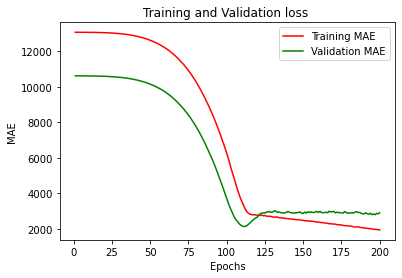

In [138]:
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [139]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

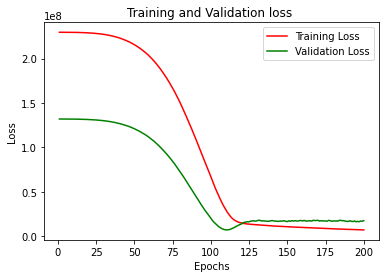

In [140]:
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [141]:
Y_test

26      7609.0
147    10198.0
126    32528.0
199    18950.0
117    18150.0
        ...   
183     7975.0
38      9095.0
113    16695.0
88      9279.0
77      6189.0
Name: price, Length: 61, dtype: float64

In [142]:
network.predict(X_test)

array([[ 5207.311 ],
       [ 8016.6323],
       [15334.881 ],
       [18330.203 ],
       [17369.455 ],
       [ 9009.487 ],
       [14206.832 ],
       [10915.884 ],
       [13897.444 ],
       [10334.483 ],
       [16879.467 ],
       [15851.221 ],
       [ 5780.656 ],
       [ 4998.4087],
       [24623.977 ],
       [17891.852 ],
       [ 5404.4336],
       [10079.079 ],
       [35316.676 ],
       [ 6232.8193],
       [10687.456 ],
       [19691.553 ],
       [15644.352 ],
       [ 5073.1533],
       [ 5444.1836],
       [ 8331.077 ],
       [ 5672.5864],
       [14053.96  ],
       [17070.312 ],
       [18230.467 ],
       [27356.535 ],
       [ 7701.572 ],
       [30128.25  ],
       [32352.512 ],
       [14769.038 ],
       [15788.8955],
       [10909.827 ],
       [14065.959 ],
       [11033.692 ],
       [ 5743.6836],
       [15735.7295],
       [25673.691 ],
       [15199.148 ],
       [11271.037 ],
       [ 8919.632 ],
       [ 5775.019 ],
       [15816.281 ],
       [ 5804

In [143]:
test_mse_score, test_mae_score  =network.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 29749202.0000 - mae: 3184.6450


<h2> Let's try with K-Fold technique </h2>

In [144]:
frames = [X_train,X_val ]
X_train_k_fold = pd.concat(frames)

In [145]:
X_train_k_fold.shape

(144, 52)

In [146]:
Y_frames = [Y_train, Y_val]
Y_trainKfold = pd.concat(Y_frames)

In [147]:
Y_trainKfold

74     45400.0
28      8921.0
82     12629.0
158     7898.0
66     18344.0
        ...   
175     9988.0
46     11048.0
120     6229.0
91      6649.0
21      5572.0
Name: price, Length: 144, dtype: float64

In [148]:
from tensorflow.keras import regularizers
def build_model():
    model = Sequential()
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.02), input_shape=(X_train_k_fold.shape[1],)))
    model.add(layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
    model.add(layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [149]:
import numpy as np
k = 2
num_val_samples = len(X_train_k_fold) // k
num_epochs = 300
all_scores = []

processing fold # 0


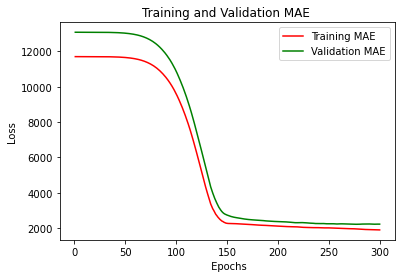

Val_MAE:   2223.603759765625
Predicted Prices:    [[ 5467.5737]
 [ 7716.8706]
 [12574.131 ]
 [15033.691 ]
 [15028.021 ]
 [ 9083.933 ]
 [11710.923 ]
 [ 9171.215 ]
 [13035.975 ]
 [ 9631.7   ]
 [15754.79  ]
 [12985.706 ]
 [ 6050.848 ]
 [ 4505.597 ]
 [19438.941 ]
 [18297.723 ]
 [ 5720.8257]
 [ 9606.076 ]
 [27155.709 ]
 [ 6098.6353]
 [ 9452.276 ]
 [16673.008 ]
 [12936.433 ]
 [ 4663.0215]
 [ 5178.2427]
 [ 7691.6646]
 [ 5811.1284]
 [12932.178 ]
 [14453.51  ]
 [15090.63  ]
 [21536.46  ]
 [ 7855.9614]
 [22764.012 ]
 [26515.945 ]
 [13721.022 ]
 [13063.0205]
 [10603.457 ]
 [12522.154 ]
 [ 9701.895 ]
 [ 5106.111 ]
 [13545.776 ]
 [23463.11  ]
 [12061.397 ]
 [10003.547 ]
 [ 7515.261 ]
 [ 5984.766 ]
 [15539.769 ]
 [ 6035.605 ]
 [ 7063.0464]
 [ 6893.8687]
 [ 3856.4612]
 [12574.131 ]
 [14212.568 ]
 [ 7593.7954]
 [12934.283 ]
 [16506.395 ]
 [ 8692.559 ]
 [ 7143.5474]
 [15630.718 ]
 [ 8014.7554]
 [ 5799.096 ]]
processing fold # 1


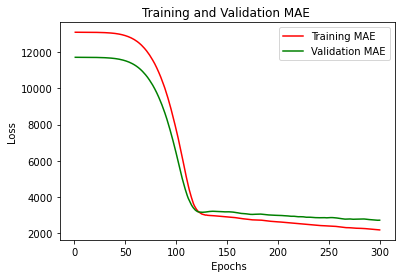

Val_MAE:   2727.9931640625
Predicted Prices:    [[ 4382.9507]
 [ 8121.521 ]
 [15354.501 ]
 [17954.264 ]
 [16620.268 ]
 [ 7582.0464]
 [13436.336 ]
 [11364.296 ]
 [13663.53  ]
 [ 9906.444 ]
 [15719.521 ]
 [15767.842 ]
 [ 4722.228 ]
 [ 4521.511 ]
 [24102.639 ]
 [17783.896 ]
 [ 4698.502 ]
 [10092.059 ]
 [34870.402 ]
 [ 5248.4575]
 [ 9999.487 ]
 [19070.654 ]
 [16473.305 ]
 [ 3427.1536]
 [ 4699.226 ]
 [ 7653.0737]
 [ 4603.495 ]
 [13342.439 ]
 [16677.53  ]
 [18895.93  ]
 [26761.805 ]
 [ 7813.0444]
 [29814.395 ]
 [32283.994 ]
 [14532.979 ]
 [16571.168 ]
 [10552.622 ]
 [13759.943 ]
 [10442.422 ]
 [ 4734.9624]
 [16032.951 ]
 [25333.182 ]
 [16011.153 ]
 [11114.585 ]
 [ 9606.053 ]
 [ 5059.393 ]
 [15597.354 ]
 [ 4754.611 ]
 [ 7343.1846]
 [ 8218.389 ]
 [ 4153.0366]
 [15354.501 ]
 [14392.045 ]
 [ 6228.1143]
 [14225.243 ]
 [19653.908 ]
 [ 7832.576 ]
 [ 7405.2236]
 [16229.729 ]
 [ 8560.754 ]
 [ 4360.063 ]]


In [150]:

for i in range(k):
    print('processing fold #', i)
    val_data = X_train_k_fold[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y_trainKfold[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train_k_fold[:i * num_val_samples],
                                         X_train_k_fold[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([Y_trainKfold[:i * num_val_samples],
                                            Y_trainKfold[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=30,verbose=0, validation_data=(val_data, val_targets))

    k_Fold_train_loss = history.history['mae']
    k_Fold_val_loss = history.history['val_mae']
    epochs = range(1,301)
    plt.plot(epochs, k_Fold_train_loss, 'r', label='Training MAE')
    plt.plot(epochs, k_Fold_val_loss, 'g', label='Validation MAE')
    plt.title('Training and Validation MAE ')
    plt.xlabel(' Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print('Val_MAE:   '+str(k_Fold_val_loss[-1]))
    print('Predicted Prices:    '+str(model.predict(X_test)))
    